# Visualize Data

selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)
selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)
selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)
selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)
selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)
selfie.shape: (256, 256, 3)
anime.shape: (256, 256, 3)


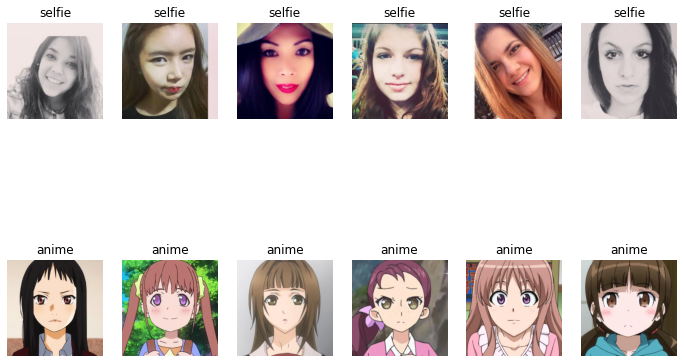

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

idxs = [1, 2, 5, 6, 7, 8]
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 8))

# selfie_dir = "data/trainA/"
# anime_dir = "data/trainB/"

selfie_dir = "data/testA/"
anime_dir = "data/testB/"

selfie_files = os.listdir(selfie_dir)
anime_files = os.listdir(anime_dir)


for i, idx in enumerate(idxs):

    selfie = plt.imread(selfie_dir+selfie_files[idx])
    anime = plt.imread(anime_dir+anime_files[idx])

    print('selfie.shape:', selfie.shape)
    print('anime.shape:', anime.shape)

    axes[0][i].axis('off')
    axes[0][i].imshow(selfie)
    axes[0][i].set_title("selfie")

    axes[1][i].imshow(anime)
    axes[1][i].axis('off')
    axes[1][i].set_title("anime")

# Pass Data to Model

In [3]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.transforms as T
import PIL
from PIL import Image
import numpy as np
import os

USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [39]:
from models import Generator, Discriminator

G = Generator()
D = Discriminator()

G.to(device)
D.to(device)

Discriminator(
  (discriminator_block): Sequential(
    (0): C_K_Block(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
    )
    (1): C_K_Block(
      (conv_block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (2): C_K_Block(
      (conv_block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (3): C_K_Block(
      (conv_block): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
        (1): InstanceNorm2d(512, eps=1e-05, momentu

In [40]:
# img = plt.imread('data/testA/female_10328.jpg')
img = Image.open('data/testA/female_10328.jpg')
pix = np.array(img)
convert_tensor = transforms.ToTensor()
img_tensor = convert_tensor(img)
# img_tensor.size()
img_tensor = img_tensor.to(device)

(256, 256, 3)

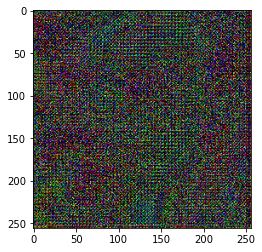

In [41]:
G_out = G(img_tensor.unsqueeze(0))
G_out = G_out.detach().to('cpu').numpy().squeeze().transpose((1,2,0))
plt.imshow((G_out * 255).astype(np.uint8))
G_out.shape

In [42]:
D_out = D(img_tensor.unsqueeze(0))
D_out.size()

torch.Size([1, 1, 30, 30])

# Construct Dataset

In [56]:
%load_ext autoreload
%autoreload 2
from dataset import *

test_A_list = get_full_list('data', 'testA')
test_A_set = Selfie_2_Anime(test_A_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
img = test_A_set[2]
img.size()

torch.Size([3, 256, 256])